In [ ]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.regularizers import l2 # type: ignore

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [3]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Layer (Extra)
model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Classifier Head
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 240s 509ms/step - loss: 0.5760 - accuracy: 0.9561 - val_loss: 0.4796 - val_accuracy: 0.9349
Epoch 2/10
469/469 [==============================] - 179s 382ms/step - loss: 0.2458 - accuracy: 0.9806 - val_loss: 0.1671 - val_accuracy: 0.9893
Epoch 3/10
469/469 [==============================] - 215s 459ms/step - loss: 0.1761 - accuracy: 0.9833 - val_loss: 0.1622 - val_accuracy: 0.9848
Epoch 4/10
469/469 [==============================] - 188s 401ms/step - loss: 0.1590 - accuracy: 0.9844 - val_loss: 0.1325 - val_accuracy: 0.9898
Epoch 5/10
469/469 [==============================] - 199s 424ms/step - loss: 0.1500 - accuracy: 0.9852 - val_loss: 0.1384 - val_accuracy: 0.9880
Epoch 6/10
469/469 [==============================] - 226s 483ms/step - loss: 0.1486 - accuracy: 0.9858 - val_loss: 0.1476 - val_accuracy: 0.9866
Epoch 7/10
469/469 [==============================] - 243s 519ms/step - loss: 0.1412 - accuracy: 0.9862 - val_loss: 0.1481 -

In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


313/313 [==============================] - 12s 37ms/step - loss: 0.1217 - accuracy: 0.9921
Test Accuracy: 99.21%


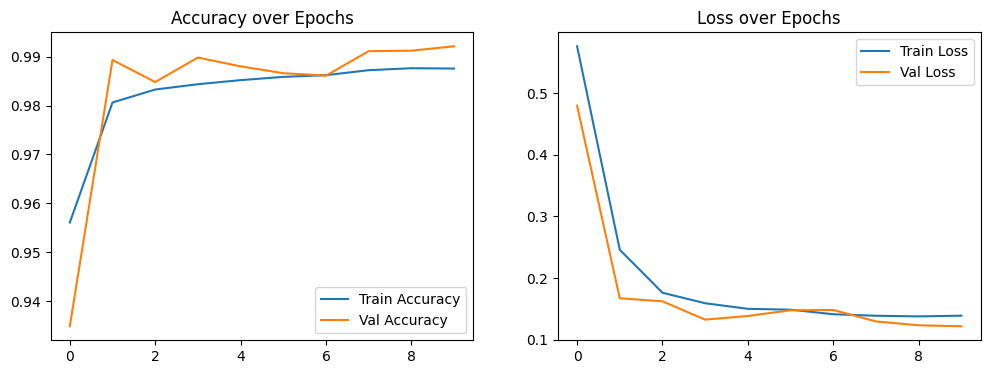

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [9]:
# Save the trained model
model.save("mnist_model.h5")
